In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

#import sklearn.metrics
from sklearn.metrics import silhouette_score
%matplotlib inline

cusData = pd.read_excel("Credit Card Customer Data.xlsx")
cusData.head()


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [2]:
cusData.dtypes
#cusData.info returs data type of each colunm and checks for null values 
print(cusData.info())
#use custData.dtypes to check data type of each colunm 
print(cusData.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
Sl_No                  660 non-null int64
Customer Key           660 non-null int64
Avg_Credit_Limit       660 non-null int64
Total_Credit_Cards     660 non-null int64
Total_visits_bank      660 non-null int64
Total_visits_online    660 non-null int64
Total_calls_made       660 non-null int64
dtypes: int64(7)
memory usage: 36.2 KB
None
Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object


In [3]:
cusData.shape

(660, 7)

In [4]:
cusData.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [5]:
# Check for missing value
cusData.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [6]:
cusDataAttr=cusData.iloc[:,2:]
cusDataScaled=cusDataAttr.apply(zscore)


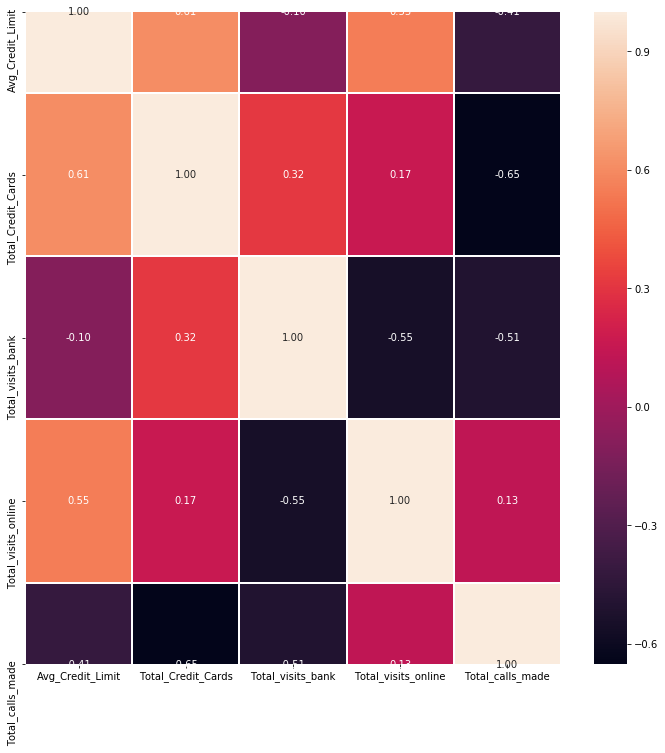

In [7]:
# show correlation using HeatMap
fig,ax = plt.subplots(figsize=(12, 12)) 
sns.heatmap(cusDataAttr.corr(), ax=ax, annot=True, linewidths=1, fmt= '.2f')
plt.show()

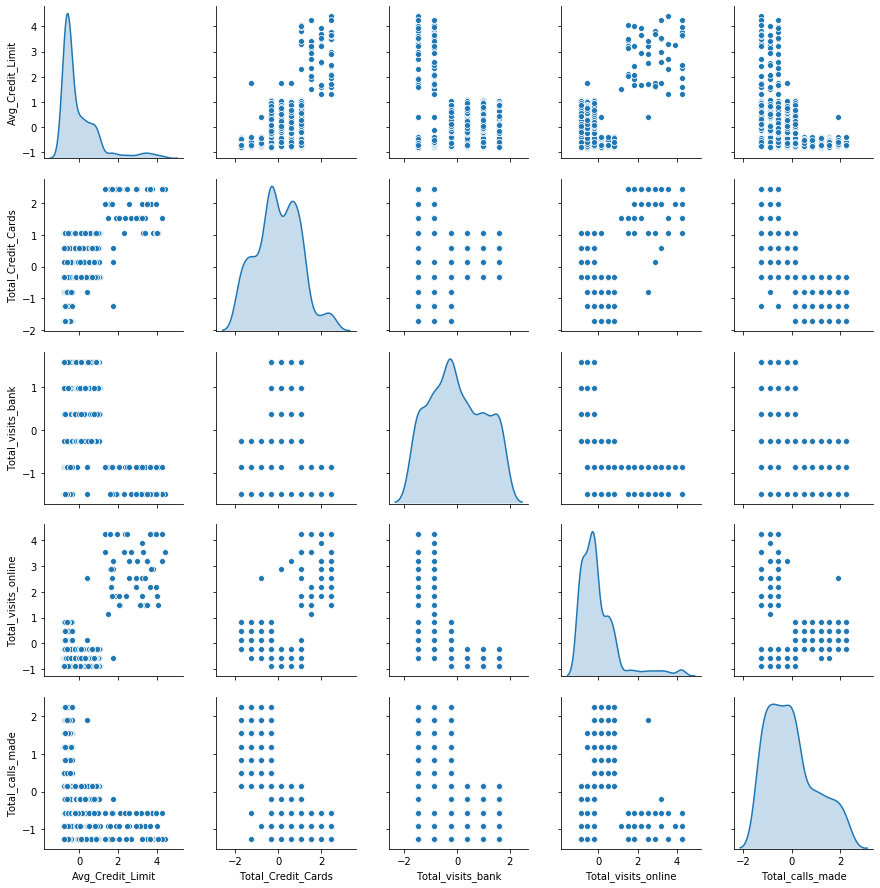

In [8]:
sns.pairplot(cusDataScaled,diag_kind='kde')

# K-Means Clustering 

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

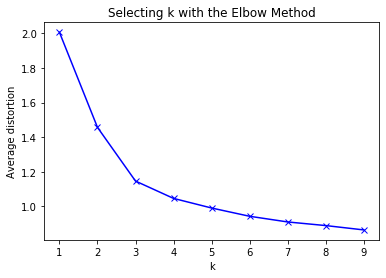

In [9]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(cusDataScaled)
    prediction=model.predict(cusDataScaled)
    meanDistortions.append(sum(np.min(cdist(cusDataScaled, model.cluster_centers_, 'euclidean'), axis=1)) / cusDataScaled.shape[0])
    #print(meanDistortions)
    #print(model.cluster_centers_)
    #print(cdist(cusDataScaled, model.cluster_centers_, 'euclidean'))

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')




In [10]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(cusDataScaled)
prediction=final_model.predict(cusDataScaled)
prediction
#calculate silihoute co-efficient 
print(f'Silhouette Score Kmeans(n=3): {silhouette_score(cusDataScaled, prediction)}')
#Append the prediction

cusData["GROUP"] = prediction

cusDataScaled["GROUP"] = prediction
print("Groups Assigned : \n")
prediction

Silhouette Score Kmeans(n=3): 0.5157182558882754
Groups Assigned : 



array([0, 2, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
customerClust = cusData.groupby(['GROUP'])
#cusData.GROUP.unique()

In [12]:
customerClust.mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,,,
0,417.528497,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000
1,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000
2,117.857143,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536


In [13]:
customerClust.count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,,,
0,386,386,386,386,386,386,386
1,50,50,50,50,50,50,50
2,224,224,224,224,224,224,224


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000192364ED1C8>,
      dtype=object)

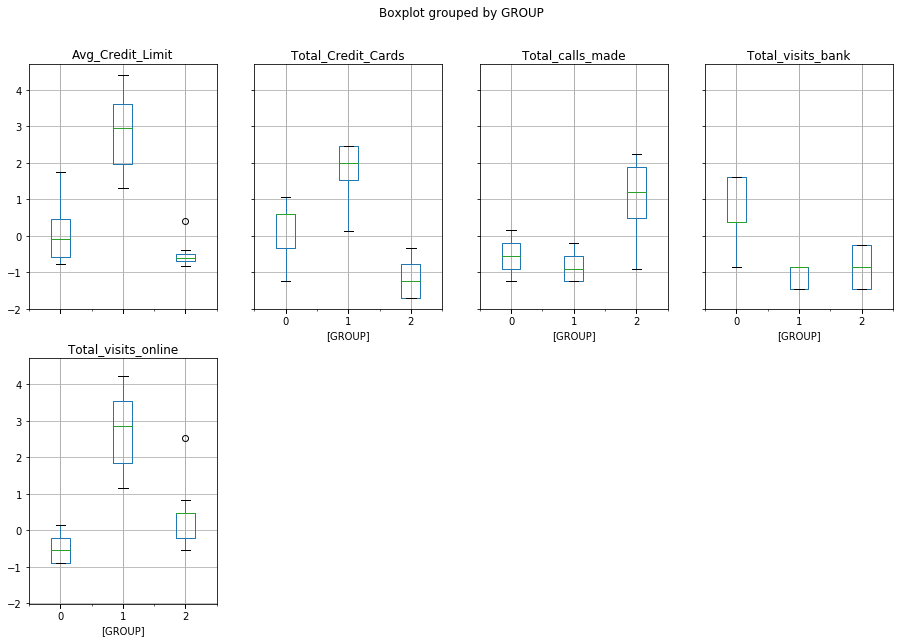

In [14]:
cusDataScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [15]:
#remove labels column from cusData and cusDataScaled2 
cusData.drop('GROUP',axis=1,inplace=True)

cusDataScaled.drop('GROUP',axis=1,inplace=True)
cusData

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [16]:
# Let try k=  4 for comparison
final_model=KMeans(4)
final_model.fit(cusDataScaled)
prediction=final_model.predict(cusDataScaled)
prediction
#calculate silihoute co-efficient 
print(f'Silhouette Score Kmeans(n=4): {silhouette_score(cusDataScaled, prediction)}')
#Append the prediction

cusData["GROUP"] = prediction

cusDataScaled["GROUP"] = prediction
print("Groups Assigned : \n")
prediction

Silhouette Score Kmeans(n=4): 0.355667061937737
Groups Assigned : 



array([1, 0, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 1, 3, 1, 3, 3, 3, 3, 1, 1, 1, 3,
       1, 3, 1, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 3, 1, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3,
       3, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3,

In [17]:
customerClust = cusData.groupby(['GROUP'])
#cusData.GROUP.unique()

In [18]:
customerClust.count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,,,
0,221,221,221,221,221,221,221
1,199,199,199,199,199,199,199
2,50,50,50,50,50,50,50
3,190,190,190,190,190,190,190


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019237C9A388>,
      dtype=object)

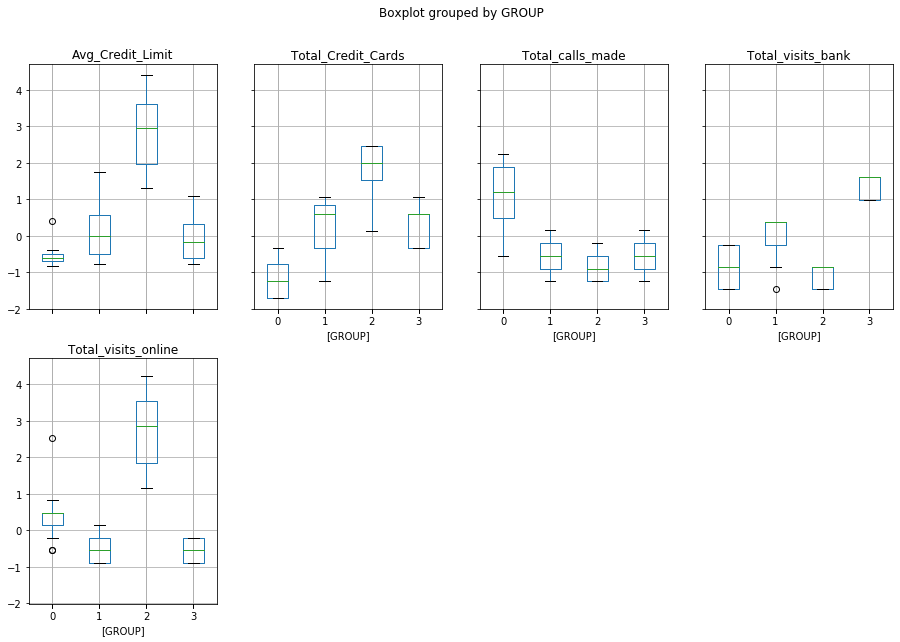

In [19]:
cusDataScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

# Hierarchical clustering 

In [20]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points


In [21]:
#remove labels column from cusData and cusDataScaled2 
cusData.drop('GROUP',axis=1,inplace=True)

cusDataScaled.drop('GROUP',axis=1,inplace=True)
cusData

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [22]:
#cusData2 =  cusData.copy()

#cusDataScaled2=cusDataAttr.apply(zscore)
#cusDataScaled2

In [23]:
Z = linkage(cusDataScaled, metric='euclidean', method='single')
c, coph_dists = cophenet(Z , pdist(cusDataScaled))


c
#

0.7391220243806552

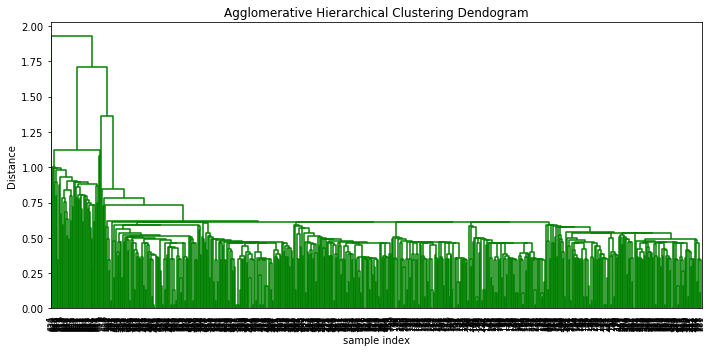

In [24]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [25]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(cusDataScaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(cusDataScaled))


c
#cusDataScaled

0.8977080867389372

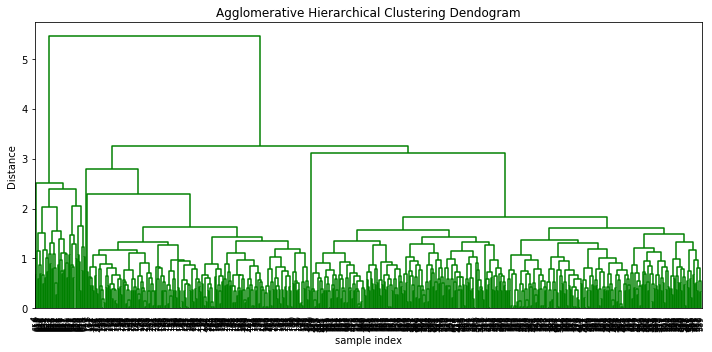

In [26]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [27]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(cusDataScaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(cusDataScaled))


c
#cusDataScaled

0.8599730607972423

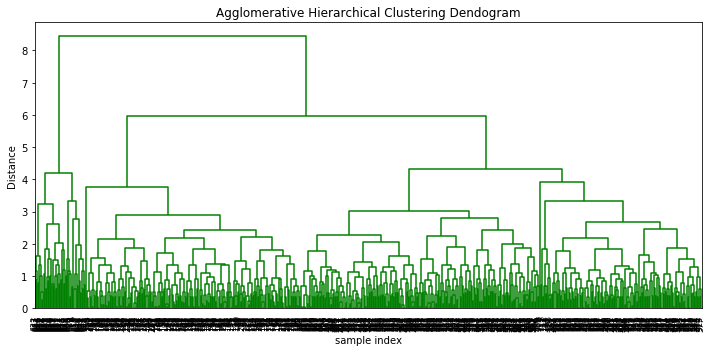

In [28]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [29]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(cusDataScaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(cusDataScaled))


c
#cusDataScaled

0.7415156284827493

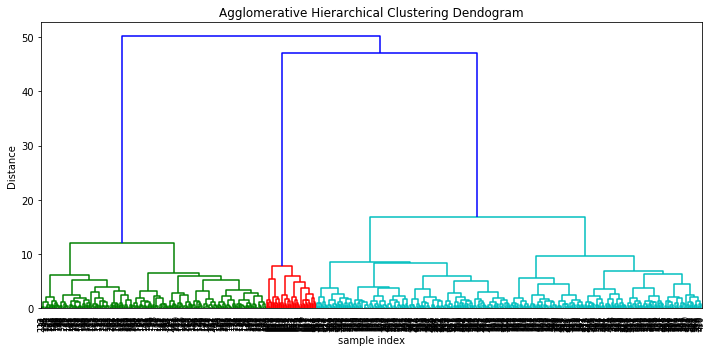

In [30]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

Average Linkage has the highest cophenet coefficient 0f 0.898 should will be used as the linkage method . The associated dendogram shows that data can be broken into 2,3,or 4 clusters depending the dendogram distance selcted, as shown below 

In [31]:
from sklearn.cluster import AgglomerativeClustering 
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='average')
model.fit(cusDataScaled)
print(f'Silhouette Score hierarchicals(n=2): {silhouette_score(cusDataScaled, model.labels_)}')

Silhouette Score hierarchicals(n=2): 0.5703183487341072


In [32]:
cusData['labels'] = model.labels_
cusData.head(10)
cusDataScaled['labels'] = model.labels_
cusDataScaled

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,0
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,1
...,...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537,1
656,1.314621,2.443892,-0.860451,3.543188,-0.553005,1
657,2.937092,1.520613,-0.860451,2.179629,-0.902271,1
658,3.655235,2.443892,-0.860451,4.224968,-1.251537,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000192366A41C8>,
      dtype=object)

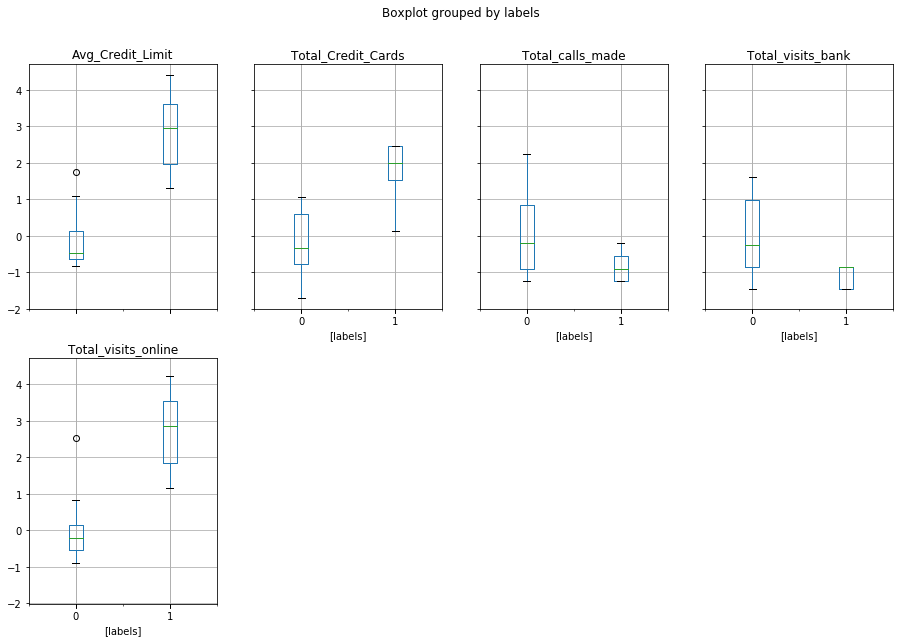

In [33]:
cusDataScaled.boxplot(by='labels', layout = (2,4),figsize=(15,10))

In [34]:
#customerClustH = cusDataScaledH.groupby(['labels'])
#customerClustH
customerClustH = cusData.groupby(['labels'])

In [35]:
customerClustH.mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,,,
0,307.485246,55012.97541,25847.540984,4.37541,2.55082,1.92623,3.788525
1,611.280000,56708.76000,141040.000000,8.74000,0.60000,10.90000,1.080000


In [36]:
customerClustH.count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,,,
0,610,610,610,610,610,610,610
1,50,50,50,50,50,50,50


In [37]:
#remove labels column from cusData and cusDataScaled2 
cusData.drop('labels',axis=1,inplace=True)

cusDataScaled.drop('labels',axis=1,inplace=True)
cusData

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [38]:

#Creating 3 clusters 
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model.fit(cusDataScaled)
print(f'Silhouette Score hierarchicals(n=3): {silhouette_score(cusDataScaled, model.labels_)}')

Silhouette Score hierarchicals(n=3): 0.5159224326511334


In [39]:
cusData['labels'] = model.labels_
cusData.head(10)
cusDataScaled['labels'] = model.labels_
cusDataScaled

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,2
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,1
...,...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537,1
656,1.314621,2.443892,-0.860451,3.543188,-0.553005,1
657,2.937092,1.520613,-0.860451,2.179629,-0.902271,1
658,3.655235,2.443892,-0.860451,4.224968,-1.251537,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001923A07A608>,
      dtype=object)

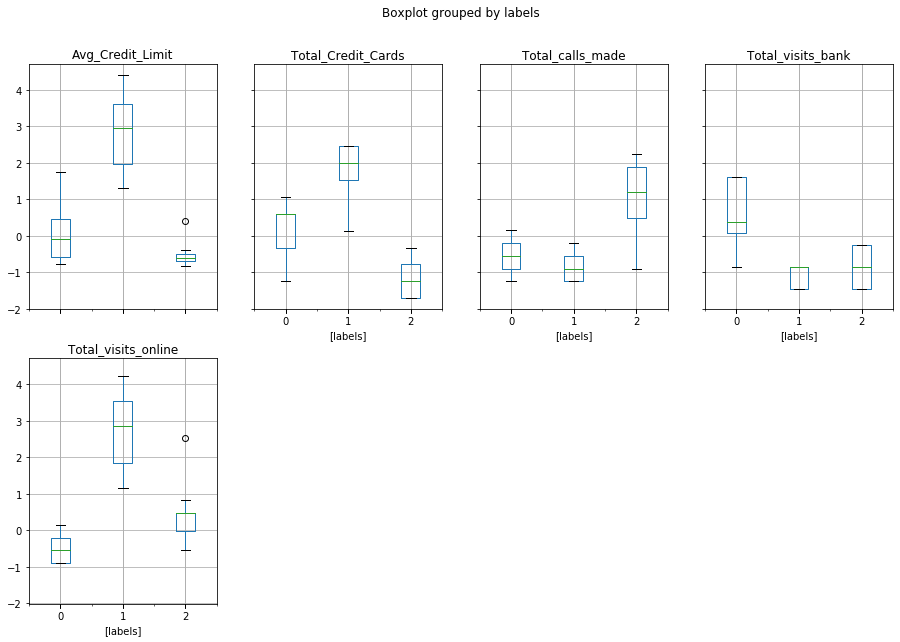

In [40]:
cusDataScaled.boxplot(by='labels', layout = (2,4),figsize=(15,10))

In [41]:
customerClustH = cusData.groupby(['labels'])

In [42]:
customerClustH.mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,,,
0,417.260982,54925.966408,33713.178295,5.511628,3.485788,0.984496,2.005168
1,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000
2,116.977578,55163.973094,12197.309417,2.403587,0.928251,3.560538,6.883408


In [43]:
customerClustH.count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,,,
0,387,387,387,387,387,387,387
1,50,50,50,50,50,50,50
2,223,223,223,223,223,223,223


In [44]:
#remove labels column from cusData and cusDataScaled2 
cusData.drop('labels',axis=1,inplace=True)

cusDataScaled.drop('labels',axis=1,inplace=True)
cusData

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [45]:
#Creating 3 clusters 
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='average')
model.fit(cusDataScaled)
print(f'Silhouette Score hierarchicals(n=4): {silhouette_score(cusDataScaled, model.labels_)}')

Silhouette Score hierarchicals(n=4): 0.4749514359581223


In [46]:
cusData['labels'] = model.labels_
cusData.head(10)
cusDataScaled['labels'] = model.labels_
cusDataScaled

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,3
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,0
2,0.410293,1.058973,-0.860451,0.134290,0.145528,2
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,2
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,1
...,...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537,1
656,1.314621,2.443892,-0.860451,3.543188,-0.553005,1
657,2.937092,1.520613,-0.860451,2.179629,-0.902271,1
658,3.655235,2.443892,-0.860451,4.224968,-1.251537,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001923A4309C8>,
      dtype=object)

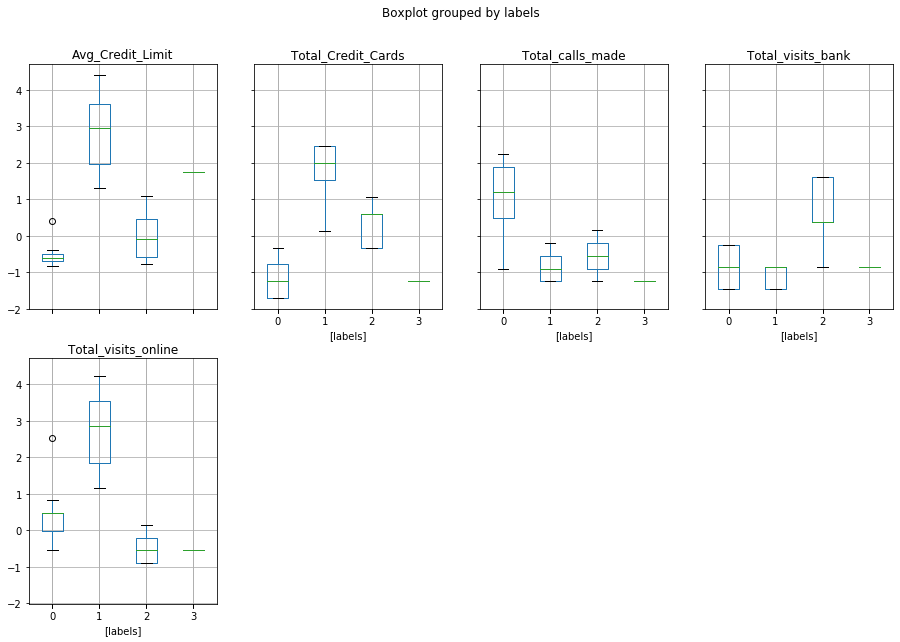

In [47]:
cusDataScaled.boxplot(by='labels', layout = (2,4),figsize=(15,10))

In [48]:
customerClustH = cusData.groupby(['labels'])
customerClustH.mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,,,
0,116.977578,55163.973094,12197.309417,2.403587,0.928251,3.560538,6.883408
1,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000
2,418.339378,54842.683938,33541.450777,5.520725,3.492228,0.984456,2.010363
3,1.000000,87073.000000,100000.000000,2.000000,1.000000,1.000000,0.000000


In [49]:
customerClustH.count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,,,
0,223,223,223,223,223,223,223
1,50,50,50,50,50,50,50
2,386,386,386,386,386,386,386
3,1,1,1,1,1,1,1


###### silhouette co-efficient 
3 clusters -:
Silhouette Score Kmeans(n=3): 0.5157182558882754
Silhouette Score hierarchicals(n=3): 0.5159224326511334

4 clusters-:
Silhouette Score Kmeans(n=4): 0.3889898895742776
Silhouette Score hierarchicals(n=4): 0.4749514359581223


###### Compare K-means clusters with Hierarchical clusters.


BOTH methods have thesame silhouette score of 0.516 for 3 clusters , also creating 4 clusters reduces the silhouette score. though at 0.475 Hierarchichal maintains a higher score than K-means which scored 0.388 

Both methods divides the DATA into three clusters, with each group of clusters similar to each other in terms of distribution of rows and thier chraceristics-: mean and number of rows


#####  Customer segments


Both methods can be used to create three different customer segments 
  

The follwing segments can be identified _: 

First segment -:
This group contacts customer care mostly by physically visiting the Bank and makes least use of online Banking 

Second segment -:
This group has high credit limit and total number of credit cards, uses mostly online banking 

Third Segment 
This group contacts customer care mainly through calls to the call center and has least number of credit cards


The Bank should develop personallised campaigns for each of the identified groups and ensure that the approprite campaign is presented to a customer based on the segment  he is identified to belong to .